---

# *Market Basket Analysis*

---

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,time
import os

In [2]:
df=pd.read_csv(r"Data_Set\orders_data_market_basket_analysis.csv")
df.head()

,Order ID,Order Date,Product ID,Category,Product Subcategory,Sales,Quantity,Discount,Profit
0,CA-2017-152156,11/8/2017,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2017-152156,11/8/2017,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2017-138688,6/12/2017,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2016-108966,10/11/2016,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2016-108966,10/11/2016,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164


---
## *Data Shape :*

In [3]:
df.shape

(9994, 9)

---
## *Data Info :*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order ID             9994 non-null   object 
 1   Order Date           9994 non-null   object 
 2   Product ID           9994 non-null   object 
 3   Category             9994 non-null   object 
 4   Product Subcategory  9994 non-null   object 
 5   Sales                9994 non-null   float64
 6   Quantity             9994 non-null   int64  
 7   Discount             9994 non-null   float64
 8   Profit               9994 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 702.8+ KB


---
## *Data Cleaning :*  

* *Na-Values & Duplicated rows*

In [5]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  1


In [6]:
df=df.drop_duplicates()

In [7]:
print("The Total Number of Null Values are : ", df.isna().sum().sum())
print("The Total Number of duplicated rows are : ", df.duplicated().sum())

The Total Number of Null Values are :  0
The Total Number of duplicated rows are :  0


---
## *Data Transformation :*  

* *Convert the 'Order Date' feature into datetime type and set and index*
* *colums names cleaning: (converting all to small letters and add "_" in spaces between words)*
* *Rename & capitalize columns*

In [8]:

df["Order Date"]=pd.to_datetime(df["Order Date"])

import janitor
df=df.clean_names()

df.columns=df.columns.str.capitalize()

In [9]:
df

,Order_id,Order_date,Product_id,Category,Product_subcategory,Sales,Quantity,Discount,Profit
0,CA-2017-152156,2017-11-08,FUR-BO-10001798,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,CA-2017-152156,2017-11-08,FUR-CH-10000454,Furniture,Chairs,731.9400,3,0.00,219.5820
2,CA-2017-138688,2017-06-12,OFF-LA-10000240,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,US-2016-108966,2016-10-11,FUR-TA-10000577,Furniture,Tables,957.5775,5,0.45,-383.0310
4,US-2016-108966,2016-10-11,OFF-ST-10000760,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...
9989,CA-2015-110422,2015-01-21,FUR-FU-10001889,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,CA-2018-121258,2018-02-26,FUR-FU-10000747,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,CA-2018-121258,2018-02-26,TEC-PH-10003645,Technology,Phones,258.5760,2,0.20,19.3932
9992,CA-2018-121258,2018-02-26,OFF-PA-10004041,Office Supplies,Paper,29.6000,4,0.00,13.3200


---
## *EDA --Exploration data analysis ---> Descriptive Analysis*  
*Numerical Features*

In [10]:
df.describe(include=["int64","float64"])

,Sales,Quantity,Discount,Profit
count,9993.000000,9993.000000,9993.000000,9993.000000
mean,229.852846,3.789753,0.156188,28.660971
std,623.276074,2.225149,0.206457,234.271476
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.731000
50%,54.480000,3.000000,0.200000,8.671000
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


*Visualzing Numerical Features*

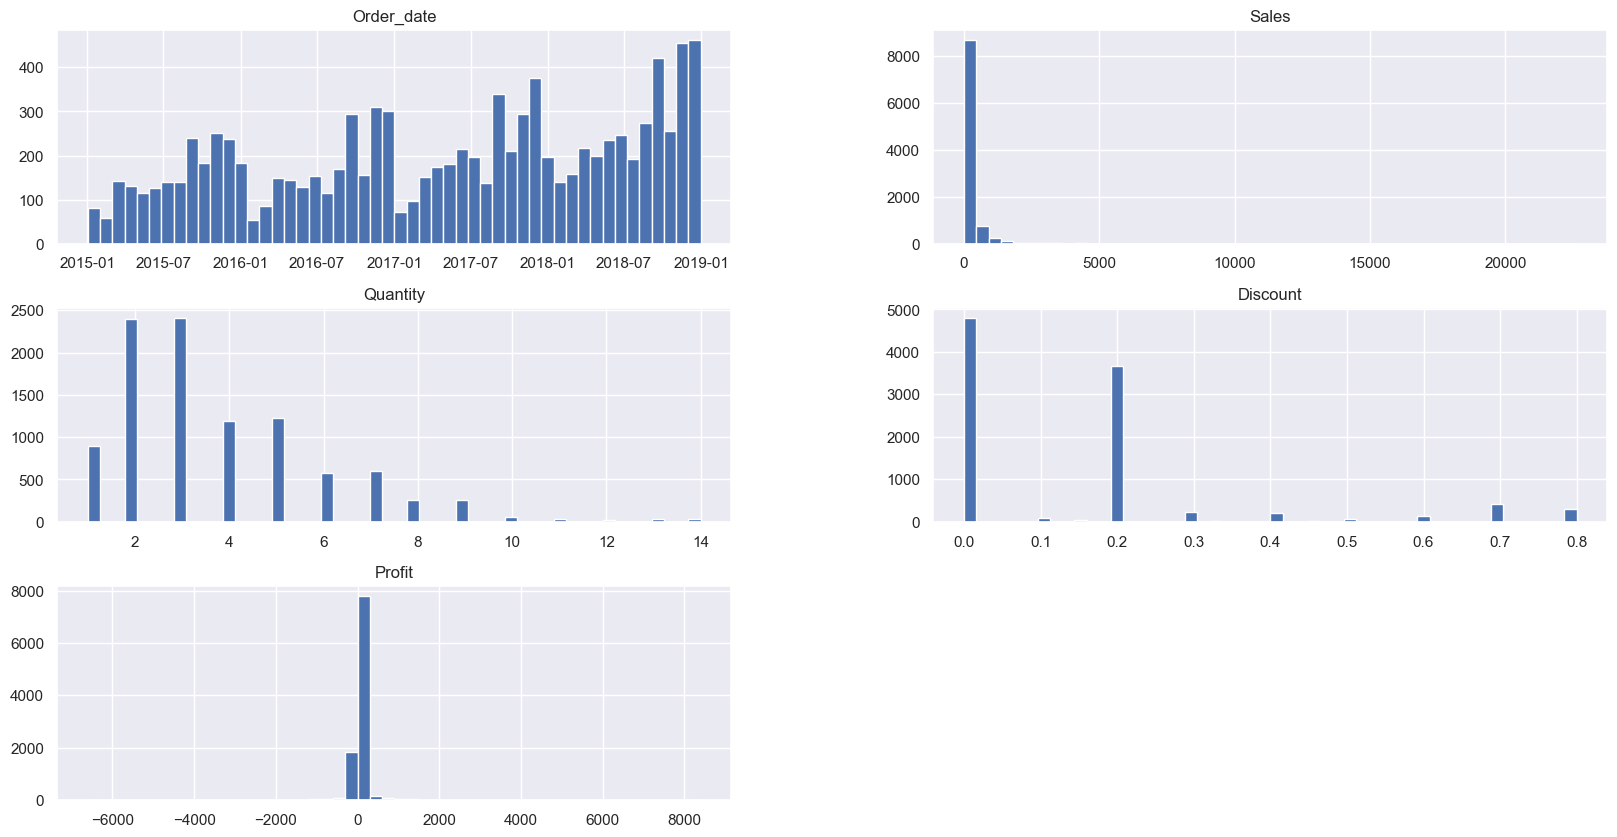

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,10))
plt.show()

===  
*Categotical Features*

In [12]:
df.describe(include="object")

,Order_id,Product_id,Category,Product_subcategory
count,9993,9993,9993,9993
unique,5009,1862,3,17
top,CA-2018-100111,OFF-PA-10001970,Office Supplies,Binders
freq,14,19,6026,1523


---
## *Market basket*

--- 
* *Group Product_subcategory By Order_id as list*

In [13]:
basket=df.groupby("Order_id")["Product_subcategory"].apply(list)
basket.head()

Order_id
CA-2015-100006              [Phones]
CA-2015-100090     [Tables, Binders]
CA-2015-100293               [Paper]
CA-2015-100328             [Binders]
CA-2015-100363    [Fasteners, Paper]
Name: Product_subcategory, dtype: object

---
* *Prepare data: --> TransactionEncoder*

In [14]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()

In [15]:
te_arry=te.fit(basket).transform(basket)
basket_df=pd.DataFrame(te_arry,columns=te.columns_)
basket_df

,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5004,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
5005,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5006,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5007,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


---
* *Get frequent_items*

In [16]:
from mlxtend.frequent_patterns import apriori,association_rules
frequent_items=apriori(basket_df,min_support=0.01,use_colnames=True)
frequent_items.sort_values(by="support",ascending=False)

,support,itemsets
3,0.262727,(Binders)
12,0.237772,(Paper)
9,0.175085,(Furnishings)
13,0.162507,(Phones)
14,0.155121,(Storage)
...,...,...
39,0.010781,"(Envelopes, Binders)"
66,0.010781,"(Phones, Binders, Paper)"
67,0.010581,"(Storage, Binders, Paper)"
64,0.010381,"(Phones, Tables)"


---
* *Get top_pairs with 2 pairs*

In [17]:
top_pairs=frequent_items[frequent_items["itemsets"].apply(lambda x: len(x)==2)].sort_values(by="support",ascending=False)
top_pairs

,support,itemsets
43,0.054901,"(Binders, Paper)"
45,0.039728,"(Storage, Binders)"
44,0.039728,"(Phones, Binders)"
41,0.039529,"(Furnishings, Binders)"
61,0.035536,"(Storage, Paper)"
54,0.035336,"(Furnishings, Paper)"
60,0.034937,"(Phones, Paper)"
19,0.032142,"(Accessories, Binders)"
22,0.030545,"(Accessories, Paper)"
34,0.029946,"(Art, Paper)"


---
* *Visualize top_pairs barplot*

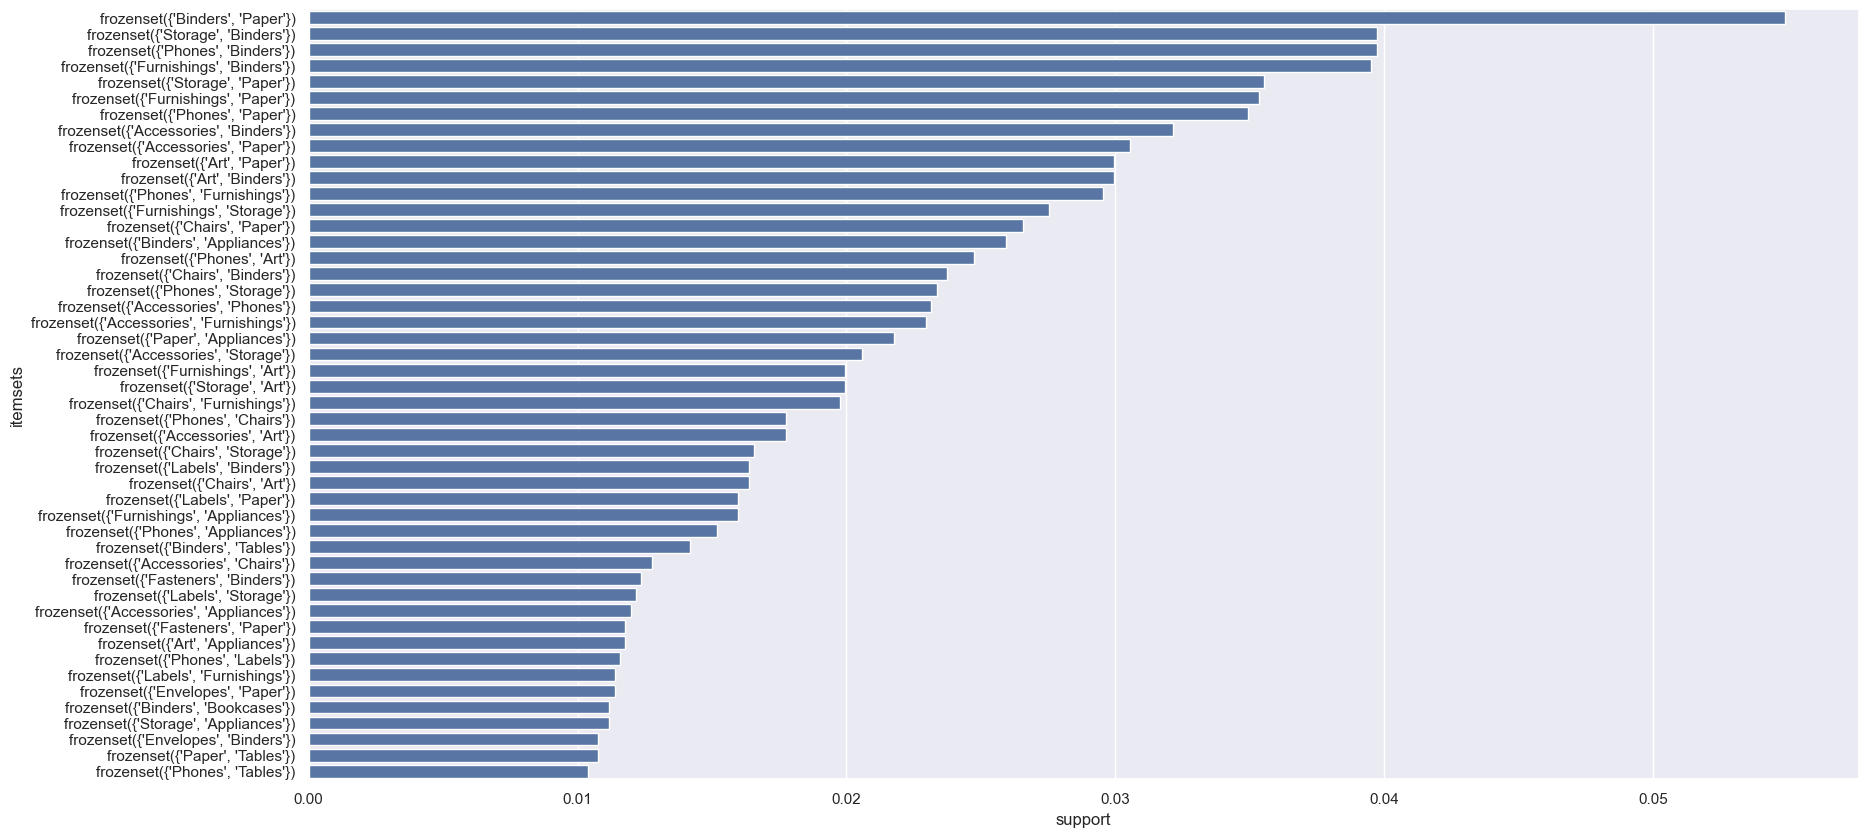

In [18]:
matplotlib.rcParams["figure.figsize"]=(20,10)
sns.barplot(data=top_pairs,y="itemsets",x="support");

* *top_10_pairs*

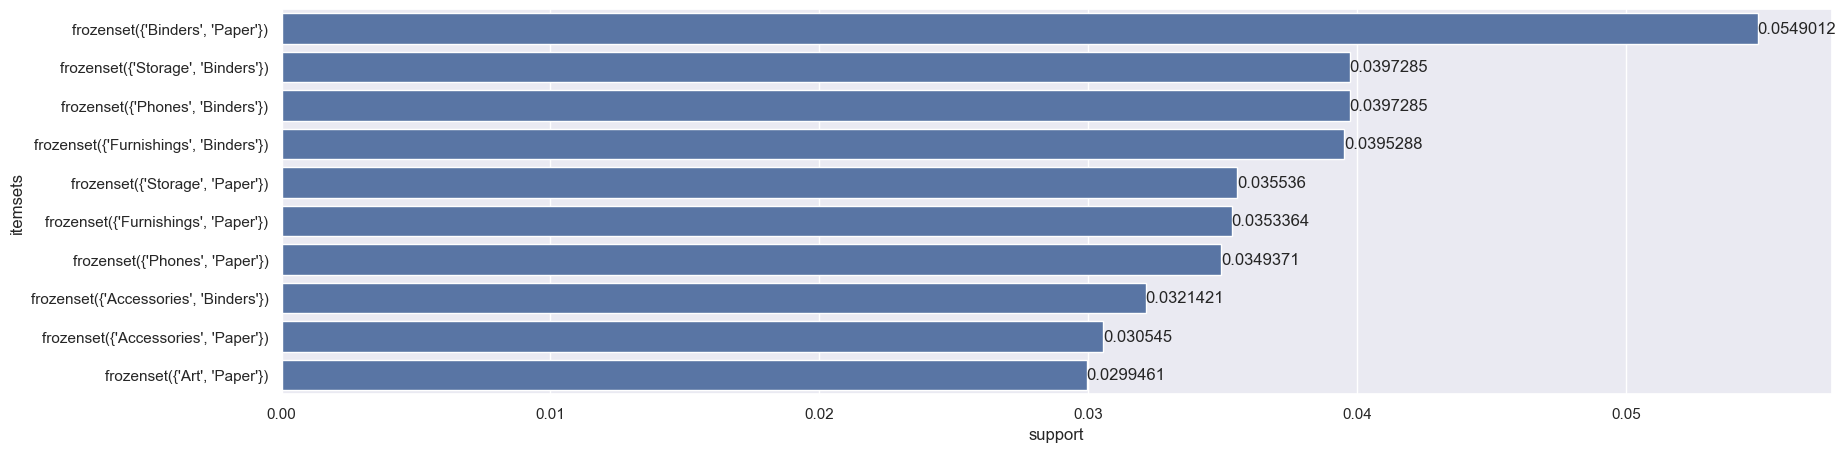

In [19]:
top_10_pairs=top_pairs.sort_values(by="support",ascending=False).head(10)
matplotlib.rcParams["figure.figsize"]=(20,5)
ax=sns.barplot(data=top_10_pairs,y="itemsets",x="support")
ax.bar_label(ax.containers[0]);

---
* *Visualize top_pairs heatmap*

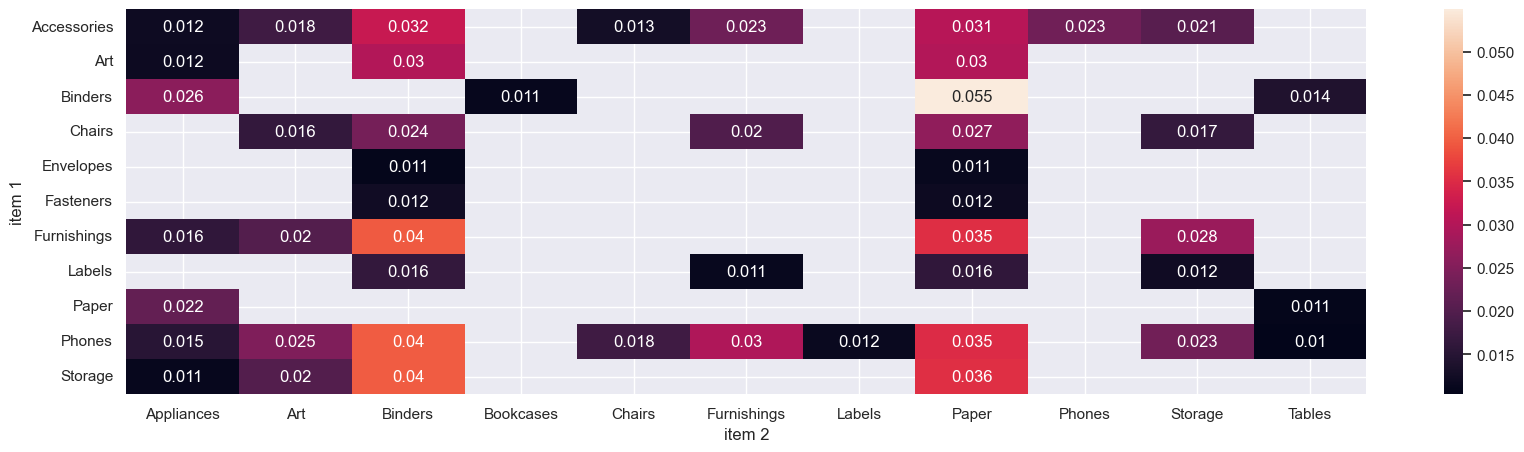

In [20]:
matplotlib.rcParams["figure.figsize"]=(20,5)
top_pairs["item 1"]=top_pairs["itemsets"].apply(lambda x: list(x)[0])
top_pairs["item 2"]=top_pairs["itemsets"].apply(lambda x: list(x)[1])
heatmap_data=pd.crosstab(top_pairs["item 1"],top_pairs["item 2"],values=top_pairs["support"],aggfunc="mean",dropna=True)
sns.heatmap(heatmap_data,annot=True);

---
* *Get top_triples with 3 pairs*

In [21]:
top_triples=frequent_items[frequent_items["itemsets"].apply(lambda x: len(x)==3)].sort_values(by="support",ascending=False)
top_triples

,support,itemsets
66,0.010781,"(Phones, Binders, Paper)"
67,0.010581,"(Storage, Binders, Paper)"
65,0.010182,"(Furnishings, Binders, Paper)"


---
* *Visualize top_triples*

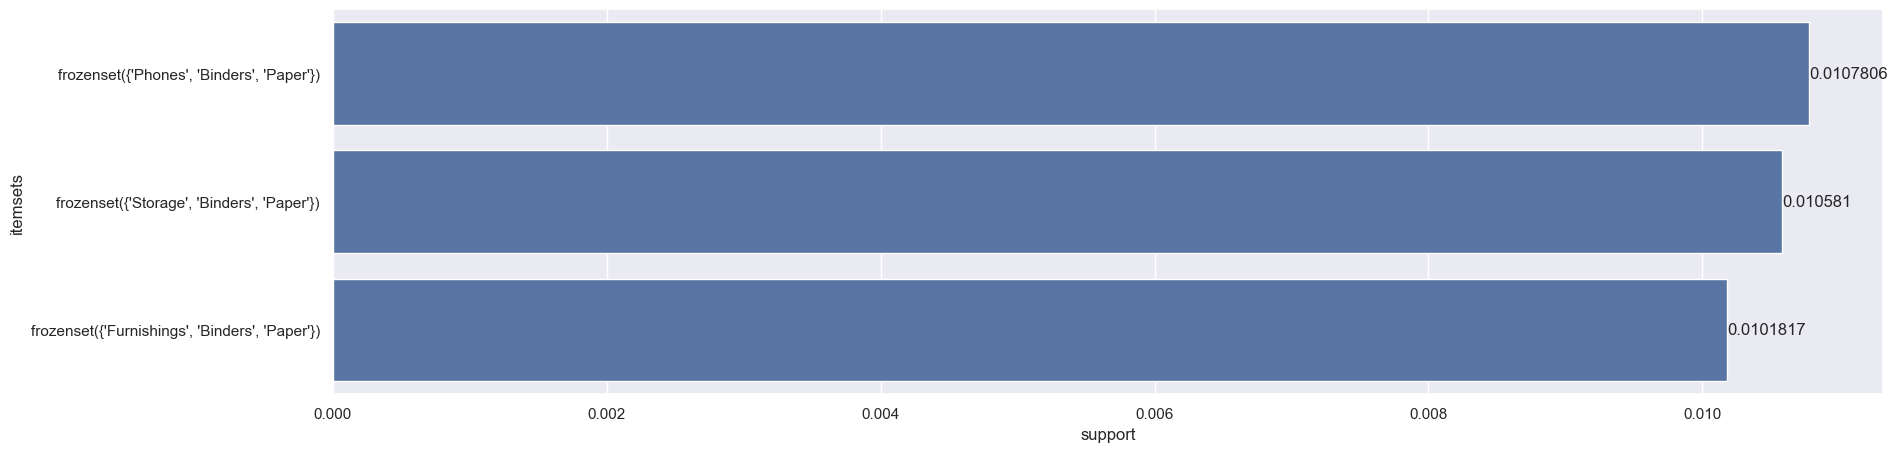

In [22]:
matplotlib.rcParams["figure.figsize"]=(20,5)
ax=sns.barplot(data=top_triples,y="itemsets",x="support")
ax.bar_label(ax.containers[0]);

---
* *Create rules Table*

In [23]:
raw_rules=association_rules(frequent_items,metric="lift",min_threshold=1)
rules=raw_rules[['antecedents', 'consequents', 'antecedent support','consequent support', 'support',
                  'confidence', 'lift']].sort_values(by="lift",ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
39,(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
38,"(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
33,(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
32,"(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
34,(Binders),"(Phones, Paper)",0.262727,0.034937,0.010781,0.041033,1.174494
31,"(Phones, Paper)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
12,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
13,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
35,(Paper),"(Phones, Binders)",0.237772,0.039728,0.010781,0.045340,1.141248
30,"(Phones, Binders)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


---
* *Join antecedents and consequents in one columns for ease understanding*

In [24]:
rules["rule"]=rules["antecedents"].apply(lambda x: ','.join(sorted(x)))+'-->'+rules["consequents"].apply(lambda x: ','.join(sorted(x)))
rules=rules[['rule']+[col for col in rules.columns if col != 'rule']]
rules=rules.reset_index(drop=True)
rules

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"Storage-->Binders,Paper",(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
1,"Binders,Paper-->Storage","(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
2,"Phones-->Binders,Paper",(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
3,"Binders,Paper-->Phones","(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
4,"Binders-->Paper,Phones",(Binders),"(Phones, Paper)",0.262727,0.034937,0.010781,0.041033,1.174494
5,"Paper,Phones-->Binders","(Phones, Paper)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
6,Fasteners-->Paper,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
7,Paper-->Fasteners,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
8,"Paper-->Binders,Phones",(Paper),"(Phones, Binders)",0.237772,0.039728,0.010781,0.045340,1.141248
9,"Binders,Phones-->Paper","(Phones, Binders)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


---

In [25]:
top_10_rules=rules.sort_values(by="lift",ascending=False).head(10)
top_10_rules

,rule,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,"Storage-->Binders,Paper",(Storage),"(Binders, Paper)",0.155121,0.054901,0.010581,0.068211,1.242434
1,"Binders,Paper-->Storage","(Binders, Paper)",(Storage),0.054901,0.155121,0.010581,0.192727,1.242434
2,"Phones-->Binders,Paper",(Phones),"(Binders, Paper)",0.162507,0.054901,0.010781,0.066339,1.208336
3,"Binders,Paper-->Phones","(Binders, Paper)",(Phones),0.054901,0.162507,0.010781,0.196364,1.208336
4,"Binders-->Paper,Phones",(Binders),"(Phones, Paper)",0.262727,0.034937,0.010781,0.041033,1.174494
5,"Paper,Phones-->Binders","(Phones, Paper)",(Binders),0.034937,0.262727,0.010781,0.308571,1.174494
6,Fasteners-->Paper,(Fasteners),(Paper),0.042923,0.237772,0.011779,0.274419,1.154125
7,Paper-->Fasteners,(Paper),(Fasteners),0.237772,0.042923,0.011779,0.049538,1.154125
8,"Paper-->Binders,Phones",(Paper),"(Phones, Binders)",0.237772,0.039728,0.010781,0.045340,1.141248
9,"Binders,Phones-->Paper","(Phones, Binders)",(Paper),0.039728,0.237772,0.010781,0.271357,1.141248


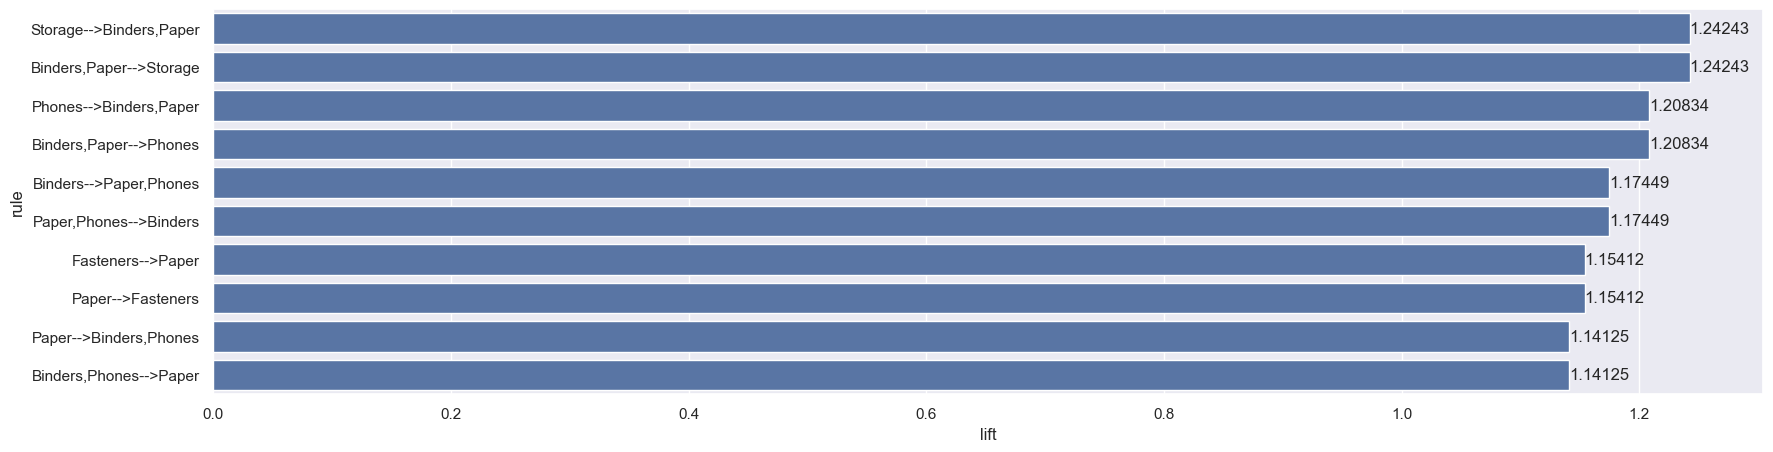

In [26]:
matplotlib.rcParams["figure.figsize"]=(20,5)
ax=sns.barplot(data=top_10_rules,y="rule",x="lift")
ax.bar_label(ax.containers[0]);

---  
*antecedent support --> the percentage of all oeders that contain antecedents*   
*consequent support' --> the percentage of all oeders that contain consequents*  
*support' --> the percentage of all oeders that contain antecedents & consequents*  

*confidence' --> what is the probability of some one bought antecedents to buy consequents as well (the conditional probability of consequents occur given antecedents) support/antecedent support*  
* *If (antecedent → consequent)  : has confidence = 0.8, it means: When people buy antecedent, 80% of the time they also buy consequent*    

*lift'  --> if its more than 1 its good*
* *Lift > 1 → Positive association (A and B occur together more than random).*  
* *Lift < 1 → Negative association (A and B occur together less than random).*  
* *Lift = 1 → No association (A and B occur together as often as random chance predicts).*

---
## *Eclat*

In [27]:
from collections import defaultdict
from itertools import combinations


def eclat(dataset, min_support=0.6):
    """
    Eclat algorithm for frequent itemset mining.
    Returns: list of (itemset, support)
    """
    # Step 1: Create TID lists (item -> set of transaction IDs)
    tid_lists = defaultdict(set)
    for tid, transaction in enumerate(dataset):
        for item in transaction:
            tid_lists[frozenset([item])].add(tid)

    # Step 2: Recursive search
    def recurse(prefix, items):
        while items:
            item, tids = items.pop()
            support = len(tids) / len(dataset)
            if support >= min_support:
                itemset = prefix.union(item)
                yield (itemset, support)
                # Prepare new combinations
                remaining_items = []
                for other_item, other_tids in items:
                    intersection_tids = tids & other_tids
                    remaining_items.append((other_item, intersection_tids))
                yield from recurse(itemset, remaining_items)

    items = list(tid_lists.items())
    return list(recurse(frozenset(), items))

In [28]:
Eclat_data_list=basket.copy()
min_support = 0.1   # the minimum frequency threshold you require for an itemset to be considered frequent
frequent_itemsets = eclat(Eclat_data_list, min_support)
print("Frequent Itemsets (min_support={}):".format(min_support))
for itemset, support in frequent_itemsets:
    print(f"{list(itemset)} -> support = {round(support, 2)}")

Frequent Itemsets (min_support=0.1):
['Storage'] -> support = 0.16
['Furnishings'] -> support = 0.18
['Accessories'] -> support = 0.14
['Chairs'] -> support = 0.11
['Art'] -> support = 0.15
['Paper'] -> support = 0.24
['Binders'] -> support = 0.26
['Phones'] -> support = 0.16


In [29]:
Eclat_df=pd.DataFrame(frequent_itemsets).sort_values(by=1,ascending=False)
Eclat_df

,0,1
6,(Binders),0.262727
5,(Paper),0.237772
1,(Furnishings),0.175085
7,(Phones),0.162507
0,(Storage),0.155121
4,(Art),0.145937
2,(Accessories),0.143342
3,(Chairs),0.114993


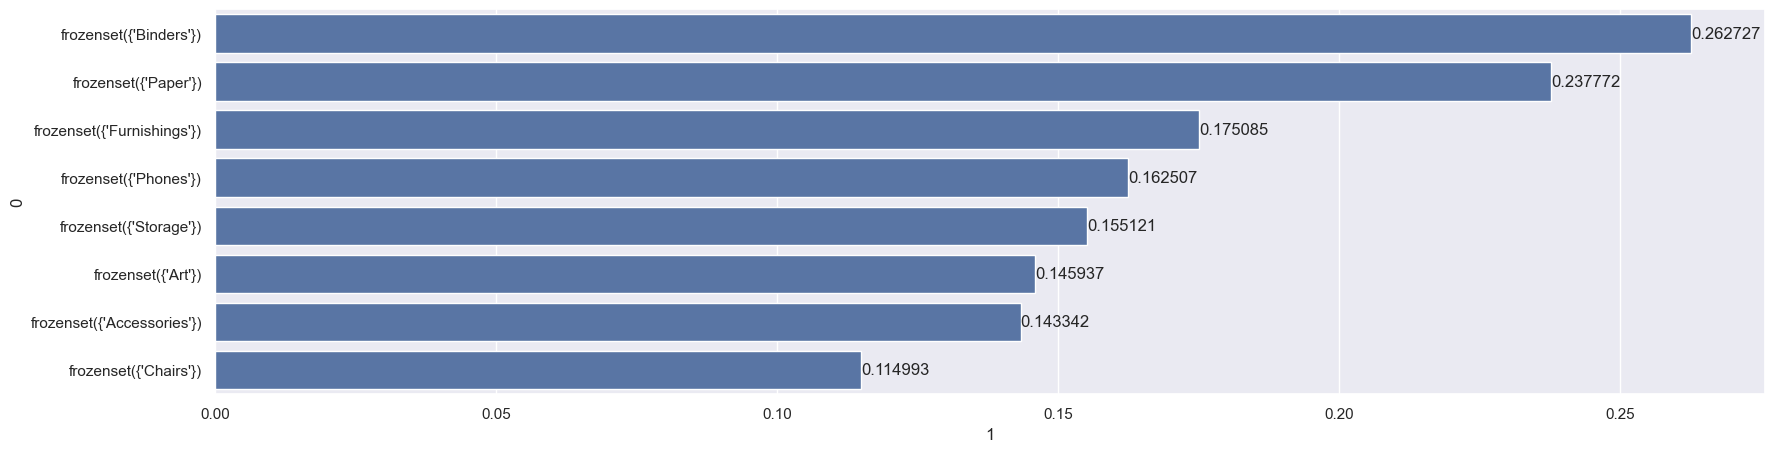

In [30]:
matplotlib.rcParams["figure.figsize"]=(20,5)
ax=sns.barplot(data=Eclat_df,y=0,x=1)
ax.bar_label(ax.containers[0]);

---